# Приоритизация гипотез и анализ A/B-теста

В данном проекте будут рассмотрены:
1. Приоритизация гипотез методами ICE и RICE, описаны различия результатов.
2. Анализ A/B-теста. В его ходе будут проведены:
   - анализ кумулятивной выручки;
   - анализ кумулятивного среднего чека;
   - анализ относительного изменения кумулятивного среднего чека;
   - анализ кумулятивной конверсии;
   - анализ относительного изменения кумулятивной конверсии;
   - анализ количества заказов по пользователям;
   - анализ стоимости заказов;
   - анализ статистической значимости разницы конверсии по "сырым" и "очищенным" данным;
   - анализ статистической значимости разницы среднего чека по "сырым" и "очищенным" данным;
   - сформулированы выводы;
   - принято решение об остановке или продолжении теста.

Импорт библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Приоритизация гипотез

В данной части проекта будут рассмотрены имеющиеся гипотезы для выявления наиболее приоритетной из них для тестирования. Гипотезы будут оценены двумя способами: ICE и RICE.

### Предобработка данных

Откроем файл с гипотезами и их параметрами:

In [2]:
pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приведём названия столбцов к snake_case:

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()

### Приоритизация фреймворком ICE

Оценим приоритет гипотез путём применения фреймворка ICE. Для расчёта использем формулу:

$$ICE = \frac{Impact * Confidence}{Efforts},$$

где:
- *Impact* - насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- *Confidence* — насколько мы уверены, что это изменение повлияет на пользователей именно так;
- *Efforts* — сколько стоит протестировать эту гипотезу.

In [4]:
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 3)

In [5]:
hypothesis[['hypothesis', 'ice']].sort_values(by = 'ice', ascending = False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


В результате применения фреймворка получили следующий топ-3 приоритетных гипотез:

1. Запустить акцию, дающую скидку на товар в день рождения;
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

### Приоритизация фреймворком RICE

Для расчёта данного показателя будем использовать следующую формулу:

$$RICE = \frac{Reach * Impact * Confidence}{Efforts},$$

где *Reach* - скольких пользователей затронет изменение, которое мы хотим внести.

In [6]:
hypothesis['rice'] = hypothesis['ice'] * hypothesis['reach']

In [7]:
hypothesis[['hypothesis', 'rice']].sort_values(by = 'rice', ascending = False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",39.999
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3.999
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000


При использовании фреймворка RICE мы получили следующий топ-3 гипотез:

1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

### Сравнение приоритетных гипотез, выявленных методами ICE и RICE

Посмотрим внимательнее на топ-3 гипотез, выявленных обоими способами:

Топ-3 гипотез, оценённых **ICE**:

1. Запустить акцию, дающую скидку на товар в день рождения;
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Топ-3 гипотез, оценённых **RICE**:

1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

При оценке способом **RICE** вместо **ICE** из топа пропал вариант скидки на товар в день рождения, а добавление формы подписки на все основные страницы поднялось на первое место. Дело в том, что при использовании фреймворка **RICE** мы дополнительно оцениваем количество пользователей, на которых повлияет вносимое изменение. В период проверки гипотезы о скидке в день рождения будет затронуто меньшее количество пользователей-именинников, нежели при проверке гипотезы о добавлении формы подписки, которая, в свою очередь, затронет в тот же период всех посетителей сайта.

## Анализ A/B-теста

В этой части проекта мы исследуем данные, полученные в результате A/B-тестирования, и на основе выводов примем решение, останавливать или продолжать тест.

### Предобработка данных

Откроем файл, содержащий информацию о заказах:

In [8]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Приведём названия столбцов к snake_case и изменим тип данных в столбце 'date':

In [10]:
orders = orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')

Проверим внесение изменений:

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Проверим датасет на наличие дубликатов:

In [12]:
orders.duplicated().sum()

0

Также откроем файл, содержащий информацию о посетителях сайта:

In [13]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Для данного файла произведём изменение типа данных в столбце 'date':

In [15]:
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')

И проверим внесение изменений:

In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Также проверим на наличие дубликатов:

In [17]:
visitors.duplicated().sum()

0

Также проверим, на каком количестве групп был проведён A/B-тест:

In [18]:
display(orders['group'].nunique())
display(visitors['group'].nunique())

2

2

Из этого можем сделать вывод, что тестирование проводилось только на двух группах: контрольной и одной тестовой. Учитывать групповые ошибки вероятности нет необходимости.

Проверим, оказался ли кто-то из пользователей в обеих группах. Для этого рассчитаем количество уникальных пользователей в каждой из групп и суммируем результаты:

In [19]:
orders.groupby('group').agg({'visitor_id': 'nunique'}).sum()

visitor_id    1089
dtype: int64

И посчитаем количество уникальных пользователей без разделения на группы:

In [20]:
orders['visitor_id'].nunique()

1031

Получили разницу в 58 пользователей, т.е. 58 пользователей попали в обе группы теста. Это составляет около 5% от общего количества пользователей, поэтому исключать их на данном этапе не будем. В случае, если эти пользователи в процессе анализа будут признаны аномальными, они будут исключены далее в ходе анализа.

### Анализ кумулятивной выручки

Рассчитаем кумулятивную выручку по группам. Для этого пошагово:

Сформируем массив уникальных значений дат и групп:

In [21]:
date_group = orders[['date', 'group']].drop_duplicates()

Сформируем датафрейм, который содержит в себе следующие данные:

- дата;
- группа;
- количество уникальных заказов в группе по указанную дату включительно;
- количество уникальных пользователей, совершивших заказы, по указанную дату включительно;
- кумулятивная выручка в группе на указанную дату включительно.

In [22]:
transactions_agg = date_group.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
                                                                    orders['group'] == x['group'])]
                              .agg({'date': 'max', 
                                    'group': 'max', 
                                    'transaction_id': 'nunique', 
                                    'visitor_id': 'nunique', 
                                    'revenue': 'sum'}), axis = 1).sort_values(by = ['date', 'group'])

Также сформируем датафрейм, который будет содержать следующие данные:

- дата;
- группа;
- кумулятивное количество уникальных пользователей на указанную дату включительно.

In [23]:
visitors_agg = date_group.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
                                                                  visitors['group'] == x['group'])]
                                .agg({'date': 'max', 
                                      'group': 'max', 
                                      'visitors': 'sum'}), axis = 1).sort_values(by = ['date', 'group'])

И объединим эти датафреймы:

In [24]:
cumul_data = transactions_agg.merge(visitors_agg, left_on = ['date', 'group'],
                                    right_on = ['date', 'group'])
cumul_data = cumul_data.rename(columns = {'transaction_id': 'transactions',
                                         'visitor_id': 'buyers'})
cumul_data.head()

,date,group,transactions,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Разделим данные о выручке и заказах по отдельным группам на две разных таблицы:

In [25]:
group_a = cumul_data[cumul_data['group'] == 'A'][['date', 'revenue', 'transactions']]
group_b = cumul_data[cumul_data['group'] == 'B'][['date', 'revenue', 'transactions']]

По данным двух таблиц построим график кумулятивной выручки по группам. Зададим функцию, которая будет принимать следющие параметры:
- size - размер графика;
- a_xdata - данные для оси X группы А;
- a_ydata - данные для оси Y группы А;
- b_xdata - данные для оси X группы Б;
- b_ydata - данные для оси Y группы Б;
- title - название графика;
- xlabel - подпись оси X;
- ylabel - подпись оси Y.

In [26]:
def group_plot(size, a_xdata, a_ydata, b_xdata, b_ydata, title, xlabel, ylabel):
    plt.figure(figsize = size)
    plt.plot(a_xdata, a_ydata, label = 'A')
    plt.plot(b_xdata, b_ydata, label = 'B')
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

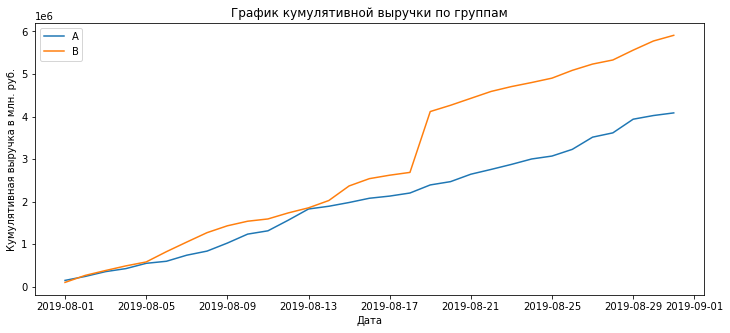

In [27]:
group_plot(size = (12, 5),
    a_xdata = group_a['date'],
    a_ydata = group_a['revenue'],
    b_xdata = group_b['date'],
    b_ydata = group_b['revenue'],
    title = 'График кумулятивной выручки по группам',
    xlabel = 'Дата',
    ylabel = 'Кумулятивная выручка в млн. руб.')

График показывает, что кумулятивная выручка группы Б стабильно выше выручки группы А начиная с 19.08.2019 почти на 2 млн. руб. Веротно, это обусловлено тем, что для видимых изменений необходимо было, чтобы прошло некоторое время (например, если мы исследовали гипотезу, приоритизированную ранее методом RICE, с момента добавления на страницы сайта формы для e-mail рассылок до момента первой рассылки могло пройти некоторое время: добавили форму на сайт и начали проведение теста 01.08, а первую рассылку по собранной базе запустили 19.08).

### Анализ кумулятивного среднего чека

Построим по данным созданных ранее таблиц график кумулятивного среднего чека:

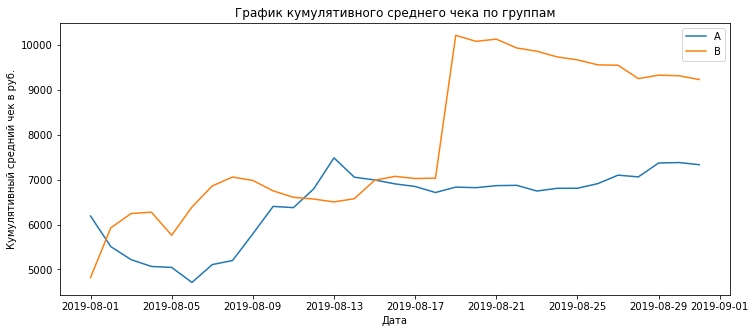

In [28]:
group_plot(size = (12, 5),
          a_xdata = group_a['date'],
          a_ydata = group_a['revenue'] / group_a['transactions'],
          b_xdata = group_b['date'],
          b_ydata = group_b['revenue'] / group_b['transactions'],
          title = 'График кумулятивного среднего чека по группам',
          xlabel = 'Дата',
          ylabel = 'Кумулятивный средний чек в руб.')

Кумулятивный средний чек группы Б после колебаний также стал резко выше с 19.08 почти на 3 000 руб., но постепенно снижается. И это снова, вероятнее всего, обусловлено необходимостью прохождения определённого количества времени с начала эксперимента, или же крупными заказами на старте рассылки.

### Анализ относительного изменения кумулятивного среднего чека

Для построения графика соберём отдельный датафрейм, который будет содержать:

- дату;
- кумулятивную выручку группы А;
- кумулятивную выручку группы Б;
- количество уникальных заказов группы А;
- количество уникальных заказов группы Б.

In [29]:
cumul_revenue = group_a.merge(group_b, 
                              left_on = 'date', 
                              right_on = 'date', 
                              how = 'left', 
                              suffixes = ['_a', '_b'])
cumul_revenue.head()

,date,revenue_a,transactions_a,revenue_b,transactions_b
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


И по данным полученной таблицы построим график относительного изменения кумулятивного среднего чека:

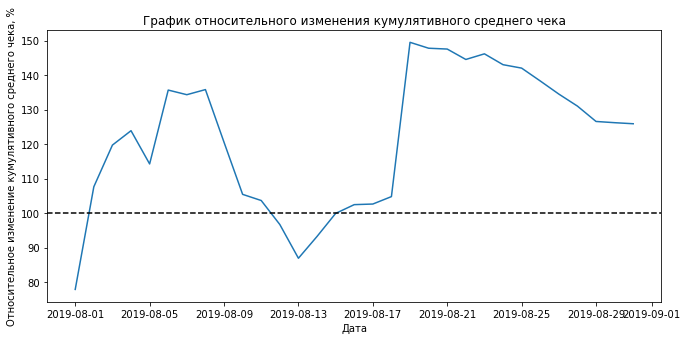

In [30]:
plt.figure(figsize = (11, 5))
plt.plot(cumul_revenue['date'],
        (cumul_revenue['revenue_b'] / cumul_revenue['transactions_b']) /
        ((cumul_revenue['revenue_a'] / cumul_revenue['transactions_a']) - 1) * 100)
plt.title('График относительного изменения кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кумулятивного среднего чека, %')
plt.axhline(y = 100,
           color = 'black',
           linestyle = '--');

На графике заметны резкие увеличения и уменьшения разницы между группами. Это говорит о том, что в данных есть выбросы - особенно крупные заказы.

### Анализ кумулятивной конверсии

Для анализа конверсии добавим соответствующие столбцы таблиц с данными по группам:

In [31]:
group_a['conversion'] = (group_a['transactions'] / cumul_data[cumul_data['group'] == 'A']['visitors']) * 100
group_b['conversion'] = (group_b['transactions'] / cumul_data[cumul_data['group'] == 'B']['visitors']) * 100

И на основании этих данных построим соответствующий график:

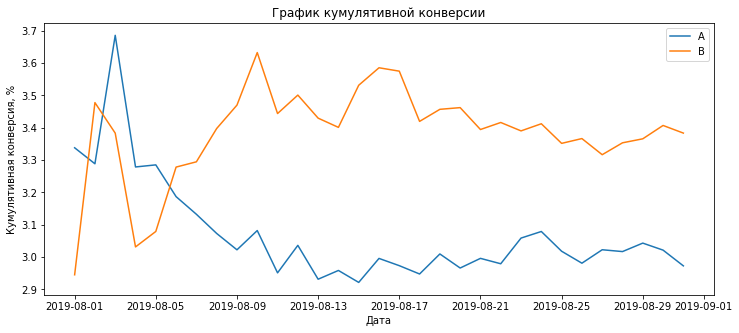

In [32]:
group_plot(size = (12, 5),
          a_xdata = group_a['date'],
          a_ydata = group_a['conversion'],
          b_xdata = group_b['date'],
          b_ydata = group_b['conversion'],
          title = 'График кумулятивной конверсии',
          xlabel = 'Дата',
          ylabel = 'Кумулятивная конверсия, %')

График показывает, что конверсия группы Б стабильно выше, начиная с конца первой недели проведения эксперимента. При этом с 19.08 конверсия группы Б стабилизируется, колеблется в пределах 0,1% показывая разницу с конверсией группы А примерно в 0,3%.

### Анализ относительного изменения кумулятивной конверсии

Добавим столбцы с конверсией к таблице cumul_revenue:

In [33]:
cumul_revenue = cumul_revenue.merge(group_a[['date', 'conversion']], 
                                    left_on = 'date', 
                                    right_on = 'date', 
                                    how = 'left').rename(columns = {'conversion': 'conversion_a'})
cumul_revenue = cumul_revenue.merge(group_b[['date', 'conversion']], 
                                    left_on = 'date', 
                                    right_on = 'date', 
                                    how = 'left').rename(columns = {'conversion': 'conversion_b'})

И построим соответствующий график:

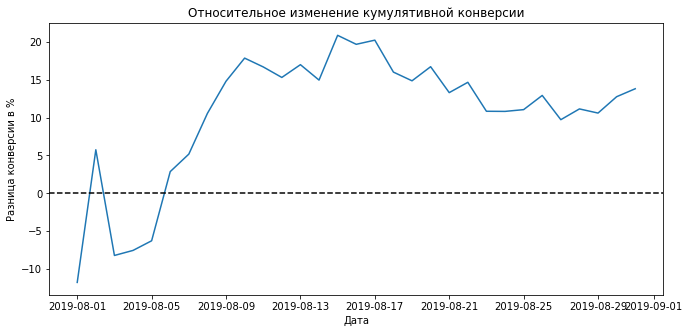

In [34]:
plt.figure(figsize = (11, 5))
plt.plot(cumul_revenue['date'],
        ((cumul_revenue['conversion_b'] / cumul_revenue['conversion_a'] - 1)) * 100)
plt.title('Относительное изменение кумулятивной конверсии')
plt.xlabel('Дата')
plt.ylabel('Разница конверсии в %')
plt.axhline(y = 0, color = 'black', linestyle = '--');

Относительная конверсия группы Б выше также с конца первой недели, притом стабильно выше более, чем на 10%.

### Анализ количества заказов по пользователям

В целях анализа количества заказов по пользователям в первую очередь рассчитаем количество заказов для каждого из пользователей:

In [35]:
orders_by_users = orders.groupby('visitor_id')\
.agg({'transaction_id': 'nunique'})\
.reset_index()\
.rename(columns = {'transaction_id': 'transactions'})\
.sort_values(by = 'transactions', ascending = False)

orders_by_users

,visitor_id,transactions
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


В получившейся таблице мы видим как пользователей с одним заказом, так и пользователей с >10 заказов. Построим гистограмму распределения:

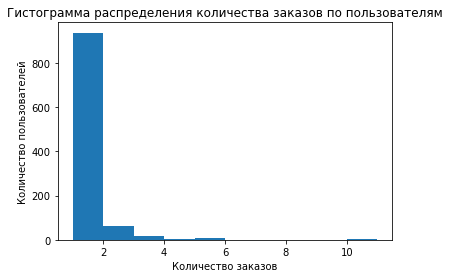

In [36]:
plt.hist(orders_by_users['transactions'])
plt.title('Гистограмма распределения количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей');

По данным гистограммы большая часть пользователей совершила только один заказ. Посмотрим также точечную диаграмму распределения:

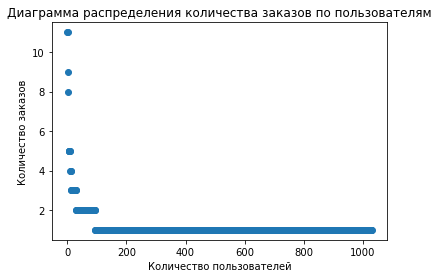

In [37]:
plt.scatter(range(0,len(orders_by_users)), orders_by_users['transactions'])
plt.title('Диаграмма распределения количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов');

Точечная диаграмма показывает те же результаты, что и гистограмма: абсолютное большинство пользователей совершили только один заказ, а свыше 3 заказов - практически единичные случаи.

Рассчитаем 95 и 99 перцентили для определения границы аномальных пользователей:

In [38]:
np.percentile(orders_by_users['transactions'], [95, 99])

array([2., 4.])

Всего 5% пользователей оформили более 2 заказов, а 1% пользователей - более 4. На основании графиков и перцентилей примем 2 заказа за верхнюю границу.

### Анализ стоимости заказов

Произведём аналогичные действия для анализа стоимости заказов по пользователям:

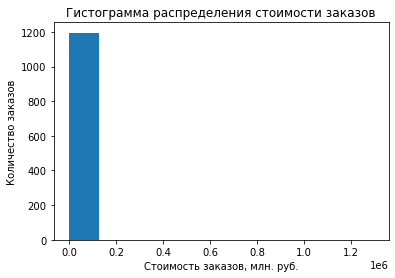

In [39]:
plt.hist(orders['revenue'])
plt.title('Гистограмма распределения стоимости заказов')
plt.xlabel('Стоимость заказов, млн. руб.')
plt.ylabel('Количество заказов');

Гистограмма показывает, что стоимость абсолютного большинства заказов находится в пределах 100 000 руб.

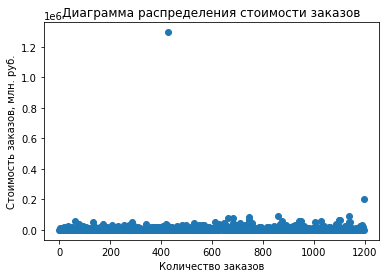

In [40]:
plt.scatter(range(0,len(orders)), orders['revenue'])
plt.title('Диаграмма распределения стоимости заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказов, млн. руб.');

Диаграмма распределения также отражает большинство заказов в рамках 100 000 руб., а также единичные выбросы около 200 000 руб. и свыше 1 200 000 руб.

Также рассмотрим аналогичный график, но с ограничением по оси Y, отсекающим аномальные значения:

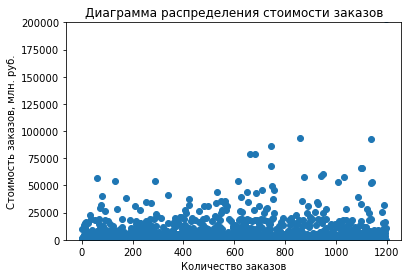

In [41]:
plt.scatter(range(0,len(orders)), orders['revenue'])
plt.title('Диаграмма распределения стоимости заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказов, млн. руб.')
plt.ylim(0, 200000);

В таком масштабе видно, что стоимость большей части заказов - примерно до 25 000 руб.

In [42]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Заказы на сумму свыше 28 000 руб. составляют только 5% от всех заказов, и 1% заказов - дороже 58 233 руб. На основании графиков и перцентилей примем 40 000 руб. за верхнюю границу стоимости заказов.

### Анализ статистической значимости разницы в конверсии

Для анализа статистической значимости конверсии обратимся к таблице orders и выделим из неё две таблицы с разбиением по группам:

In [43]:
orders_a = orders[orders['group'] == 'A']\
.groupby('visitor_id', as_index = False)\
.agg({'transaction_id': pd.Series.nunique})\
.rename(columns = {'transaction_id': 'transactions'})

orders_b = orders[orders['group'] == 'B']\
.groupby('visitor_id', as_index = False)\
.agg({'transaction_id': pd.Series.nunique})\
.rename(columns = {'transaction_id': 'transactions'})

Далее создадим списки с количеством заказов и нулями для пользователей, которые не заказали ничего:

In [44]:
sample_a = pd.concat([orders_a['transactions'], 
                      pd.Series(0, index = np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() 
                                                     - len(orders_a['transactions'])), 
                                name = 'transactions')], axis = 0)

sample_b = pd.concat([orders_b['transactions'], 
                      pd.Series(0, index = np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() 
                                                     - len(orders_b['transactions'])), 
                                name = 'transactions')], axis = 0)

Теперь к этим спискам можно применить критерий Манна-Уитни для расчёта статистической значимости разницы. В качестве α примем значение 0,05. Нулевая гипотеза: "Статистически значимых различий в конверсии группы А и конверсии группы Б нет".

In [45]:
display("{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))
display("{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))
if stats.mannwhitneyu(sample_a, sample_b)[1] < 0.05:
    display('Отвергаем гипотезу об отсутствии статистически значимых различий конверсии')
else:
    display('Нет оснований отвергать гипотезу об отсутствии статистически значимых различий конверсии')

'0.017'

'0.138'

'Отвергаем гипотезу об отсутствии статистически значимых различий конверсии'

В результате применения критерия Манна-Уитни мы получили p-value 0,017, что позволяет нам говорить о том, что статистическая разница конверсии групп имеет место. Относительная разница конверсии группы Б - 13,8%.

Однако мы ещё не исключали из выборок аномальные заказы и пользователей с большим количеством покупок - это может изменить картину.

### Анализ статистической значимости разницы среднего чека

Применим критерий Манна-Уитни для расчёта статистической значимости разницы. В качестве α примем значение 0,05. Нулевая гипотеза: "Статистически значимых различий в среднем чеке группы А и среднем чеке группы Б нет".

In [46]:
display("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], 
                                            orders[orders['group'] == 'B']['revenue'])[1]))
display("{0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() 
                         / orders[orders['group'] == 'A']['revenue'].mean() - 1))
if stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1] < 0.05:
    display('Отвергаем гипотезу об отсутствии статистически значимых различий среднего чека')
else:
    display('Нет оснований отвергать гипотезу об отсутствии статистически значимых различий среднего чека')

'0.729'

'0.259'

'Нет оснований отвергать гипотезу об отсутствии статистически значимых различий среднего чека'

Мы получили довольно высокое значение p-value, что говорит о том, что отвергнуть гипотезу отсутствии разницы среднего чека мы не можем. Однако относительная разница среднего чека группы Б - 25,9%. 

Опять же, после фильтрации данных от "выбросов" мы, возможно, увидим другие результаты.

### Анализ статистической значимости разницы в конверсии по "очищенным" данным

Вернёмся к пунктам 2.7 и 2.8 проекта, где мы проводили анализ количества заказов по пользователям и анализ стоимости заказов. Тогда на основе получившихся графиков и перцентилей мы приняли верхние границы:
- 2 заказа на пользователя;
- 40 000 руб. для стоимости заказа.

У нас уже есть таблицы с заказами пользователей по группам (orders_a и orders_b). На основе данных этих таблиц составим таблицу с пользователями, которые совершили более 2 заказов:

In [47]:
users_wmany_orders = pd.concat([orders_a[orders_a['transactions'] > 2]['visitor_id'],
                               orders_b[orders_b['transactions'] > 2]['visitor_id']],
                              axis = 0)

К получившейся таблице добавим пользователей с большими заказами и посмотрим, сколько пользователей мы будем отсекать в качестве аномальных:

In [48]:
abnorm_users = pd.concat([users_wmany_orders,
                         orders[orders['revenue'] > 40000]['visitor_id']],
                        axis = 0)
abnorm_users.nunique()

45

Это около 4% всех пользователей.

Мы получили таблицу с пользователями, чьи заказы мы считаем "выбросами". Теперь подготовим таблицы для применения критерия Манна-Уитни, исключив этих пользователей из данных:

In [49]:
filt_sample_a = pd.concat([orders_a[np.logical_not(orders_a['visitor_id'].isin(abnorm_users))]['transactions'],
                          pd.Series(0, index = np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() 
                                                     - len(orders_a['transactions'])), name = 'transactions')],
                         axis = 0)
filt_sample_b = pd.concat([orders_b[np.logical_not(orders_b['visitor_id'].isin(abnorm_users))]['transactions'],
                          pd.Series(0, index = np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() 
                                                     - len(orders_b['transactions'])), name = 'transactions')],
                         axis = 0)

И применим критерий Манна-Уитни. В качестве α примем значение 0,05. Нулевая гипотеза: "Статистически значимых различий в конверсии группы А и конверсии группы Б нет".

In [50]:
display("{0:.3f}".format(stats.mannwhitneyu(filt_sample_a, filt_sample_b)[1]))
display("{0:.3f}".format(filt_sample_b.mean() / filt_sample_a.mean() - 1))
if stats.mannwhitneyu(filt_sample_a, filt_sample_b)[1] < 0.05:
    display('Отвергаем гипотезу об отсутствии статистически значимых различий конверсии')
else:
    display('Нет оснований отвергать гипотезу об отсутствии статистически значимых различий конверсии')

'0.007'

'0.188'

'Отвергаем гипотезу об отсутствии статистически значимых различий конверсии'

В результате применения критерия Манна-Уитни к "очищенным" данным мы получили p-value 0,007, что по-прежнему позволяет нам отвергнуть гипотезу об отсутствии разницы конверсий. Изменилась относительная разница конверсии группы Б - теперь она составляет 18,8%.

### Анализ статистической значимости разницы среднего чека по "очищенным" данным

Применим критерий Манна-Уитни для расчёта статистической значимости разницы. В качестве α примем значение 0,05. Нулевая гипотеза: "Статистически значимых различий в среднем чеке группы А и среднем чеке группы Б нет".

In [51]:
display("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A', 
                          np.logical_not(orders['visitor_id'].isin(abnorm_users)),)]['revenue'], 
orders[np.logical_and(orders['group'] == 'B', 
                          np.logical_not(orders['visitor_id'].isin(abnorm_users)),)]['revenue'])[1]))
display("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', 
                          np.logical_not(orders['visitor_id'].isin(abnorm_users)),)]['revenue'].mean()
                        / orders[np.logical_and(orders['group'] == 'A', 
                          np.logical_not(orders['visitor_id'].isin(abnorm_users)),)]['revenue'].mean()
                        - 1))
if stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                            np.logical_not(orders['visitor_id'].isin(abnorm_users)),)]['revenue'],
                      orders[np.logical_and(orders['group'] == 'B',
                                            np.logical_not(orders['visitor_id'].isin(abnorm_users)),)]['revenue'])[1] < 0.05:
    display('Отвергаем гипотезу об отсутствии статистически значимых различий среднего чека')
else:
    display('Нет оснований отвергать гипотезу об отсутствии статистически значимых различий среднего чека')

'0.944'

'0.058'

'Нет оснований отвергать гипотезу об отсутствии статистически значимых различий среднего чека'

В данном случае после фильтрации данных мы получили ещё более высокий показатель p-value и, соответственно, меньшую относительную разницу среднего чека группы Б - теперь она составляет только 5,8%.

## Вывод

Мы провели анализ данных A/B-теста. В ходе анализа выявлено:

1. Кумулятивная выручка группы Б стабильно выше выручки группы А начиная с 19.08.2019 почти на 2 млн. руб. Веротно, это обусловлено тем, что для видимых изменений необходимо было, чтобы прошло некоторое время (например, если мы исследовали гипотезу, приоритизированную ранее методом RICE, с момента добавления на страницы сайта формы для e-mail рассылок до момента первой рассылки могло пройти некоторое время: добавили форму на сайт и начали проведение теста 01.08, а первую рассылку по собранной базе запустили 19.08);
2. Кумулятивный средний чек группы Б после колебаний также стал резко выше с 19.08 почти на 3 000 руб., но постепенно снижается. И это снова, вероятнее всего, обусловлено необходимостью прохождения определённого количества времени с начала эксперимента, или же крупными заказами на старте рассылки;
3. График относительного изменения кумулятивного среднего чека не стабилен, на графике заметны резкие увеличения и уменьшения разницы между группами. Это говорит о том, что в данных есть выбросы - особенно крупные заказы;
4. Конверсия группы Б стабильно выше, начиная с конца первой недели проведения эксперимента. При этом с 19.08 конверсия группы Б стабилизируется, колеблется в пределах 0,1% показывая разницу с конверсией группы А примерно в 0,3%.
5. Относительная конверсия группы Б выше также с конца первой недели, притом стабильно выше более, чем на 10%;
6. Абсолютное большинство пользователей совершили только один заказ. Всего 5% пользователей оформили более 2 заказов, а 1% пользователей - более 4;
7. Большинство заказов в рамках 100 000 руб. Заказы на сумму свыше 28 000 руб. составляют только 5% от всех заказов, и 1% заказов - дороже 58 233 руб.;
8. Пользователи, совершившие более 2 заказов и заказы стоимостью более 40 000 руб. были признаны аномалиями;
9. В результате применения критерия Манна-Уитни к "сырым" данным мы получили p-value 0,017, что позволяет нам говорить о том, что конверсии групп не равны друг другу. Относительная разница конверсии группы Б - 13,8%;
10. Отвергнуть гипотезу о равенстве среднего чека на основании "сырых" данных не получилось. Однако относительная разница среднего чека группы Б - 25,9%;
11. В результате применения критерия Манна-Уитни к "очищенным" данным мы получили p-value 0,007, что по-прежнему позволяет нам отвергнуть гипотезу о равенстве конверсий. Изменилась относительная разница конверсии группы Б - теперь она составляет 18,8%;
12. Отвергнуть гипотезу о равенстве среднего чека на основании "очищенных" данных также не получилось. Однако мы получили меньшую относительную разницу среднего чека группы Б - теперь она составляет только 5,8%.

Также была проведена приоритизация гипотез двумя методами: **ICE** и **RICE**. Поскольку при использовании фреймворка **RICE** мы дополнительно оцениваем количество пользователей, на которых повлияет вносимое изменение, приоритетные гипотезы оказались разными в результате применения разных методов. В отличие от приоритизированной методом **ICE** гипотезы, приоритизированная методом **RICE** затронет всех пользователей сайта на протяжении периода проведения теста.

## Вердикт

Тест может быть остановлен, поскольку зафиксирована победа группы Б. Конверсия этой группы значительно выше при отстутсвии разницы в среднем чеке.